### 머신러닝 실습

#### 와인품질 등급 회귀분석

##### 데이터 수집

##### UC 어바인 머신러닝 연구소 모듈 사용


In [24]:
## 필수 라이브러리 사용 등록
import pandas as pd
from ucimlrepo import fetch_ucirepo #온라인에서 통계 데이터를 읽어오는 함수
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
wine_quality = fetch_ucirepo(id=186)

In [7]:
df_wine_quality = wine_quality.data.original

In [10]:
df_wine_quality.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


##### 머신 러닝 준비
- X,y 값 생성


In [13]:
y = df_wine_quality['quality']

In [21]:
X = df_wine_quality.drop(['quality','color'],axis=1)

In [100]:
# 훈련용 데이터와 검증(평가)용 데이터 분리
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [51]:
model = LinearRegression()

In [101]:
# 선형회귀 모델 훈련


model.fit(X_train,y_train) ## X는 독립변수 y는 종속 변수(quality)

LinearRegression()

In [102]:
y_predict = model.predict(X_test)

In [103]:
X_test

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
3103,7.0,0.17,0.74,12.80,0.045,24.0,126.0,0.99420,3.26,0.38,12.2
1419,7.7,0.64,0.21,2.20,0.077,32.0,133.0,0.99560,3.27,0.45,9.9
4761,6.8,0.39,0.34,7.40,0.020,38.0,133.0,0.99212,3.18,0.44,12.0
4690,6.3,0.28,0.47,11.20,0.040,61.0,183.0,0.99592,3.12,0.51,9.5
4032,7.4,0.35,0.20,13.90,0.054,63.0,229.0,0.99888,3.11,0.50,8.9
...,...,...,...,...,...,...,...,...,...,...,...
4294,5.7,0.23,0.28,9.65,0.025,26.0,121.0,0.99250,3.28,0.38,11.3
3757,7.4,0.18,0.27,1.30,0.048,26.0,105.0,0.99400,3.52,0.66,10.6
5954,6.4,0.31,0.28,2.50,0.039,34.0,137.0,0.98946,3.22,0.38,12.7
4418,6.0,0.21,0.34,2.00,0.042,63.0,123.0,0.99052,3.44,0.42,11.4


In [104]:
## 제곱 평균 오차로 평가
mse = mean_squared_error(y_test,y_predict)
rmse = np.sqrt(mse) # NumPy에 있는 squareroot 함수 사용하면 변환 가능
r2 = r2_score(y_test,y_predict)
## MSE,RMSE가 0에 가까우면 예측값과 실제값 간의 차이가 거의 없음
print(f'MSE  = {mse:.4f}') # 거의 오차가 없음
print(f'RMSE = {rmse}')
print(f'R^2(Variance score) ={r2}')

MSE  = 0.5326
RMSE = 0.7297748740347503
R^2(Variance score) =0.2700902006908069


In [105]:
## Y절편값, 회귀계수값
print(f'Y절편값 = {model.intercept_:.4f}')
print(f'독립변수별 회귀계수값= {np.round(model.coef_,1)}')

Y절편값 = 61.9670
독립변수별 회귀계수값= [  0.1  -1.4  -0.2   0.   -0.1   0.   -0.  -61.5   0.5   0.8   0.3]


In [106]:
pd.Series(np.round(model.coef_,2),index=X.columns)

fixed_acidity            0.08
volatile_acidity        -1.38
citric_acid             -0.15
residual_sugar           0.05
chlorides               -0.06
free_sulfur_dioxide      0.01
total_sulfur_dioxide    -0.00
density                -61.46
pH                       0.46
sulphates                0.81
alcohol                  0.27
dtype: float64

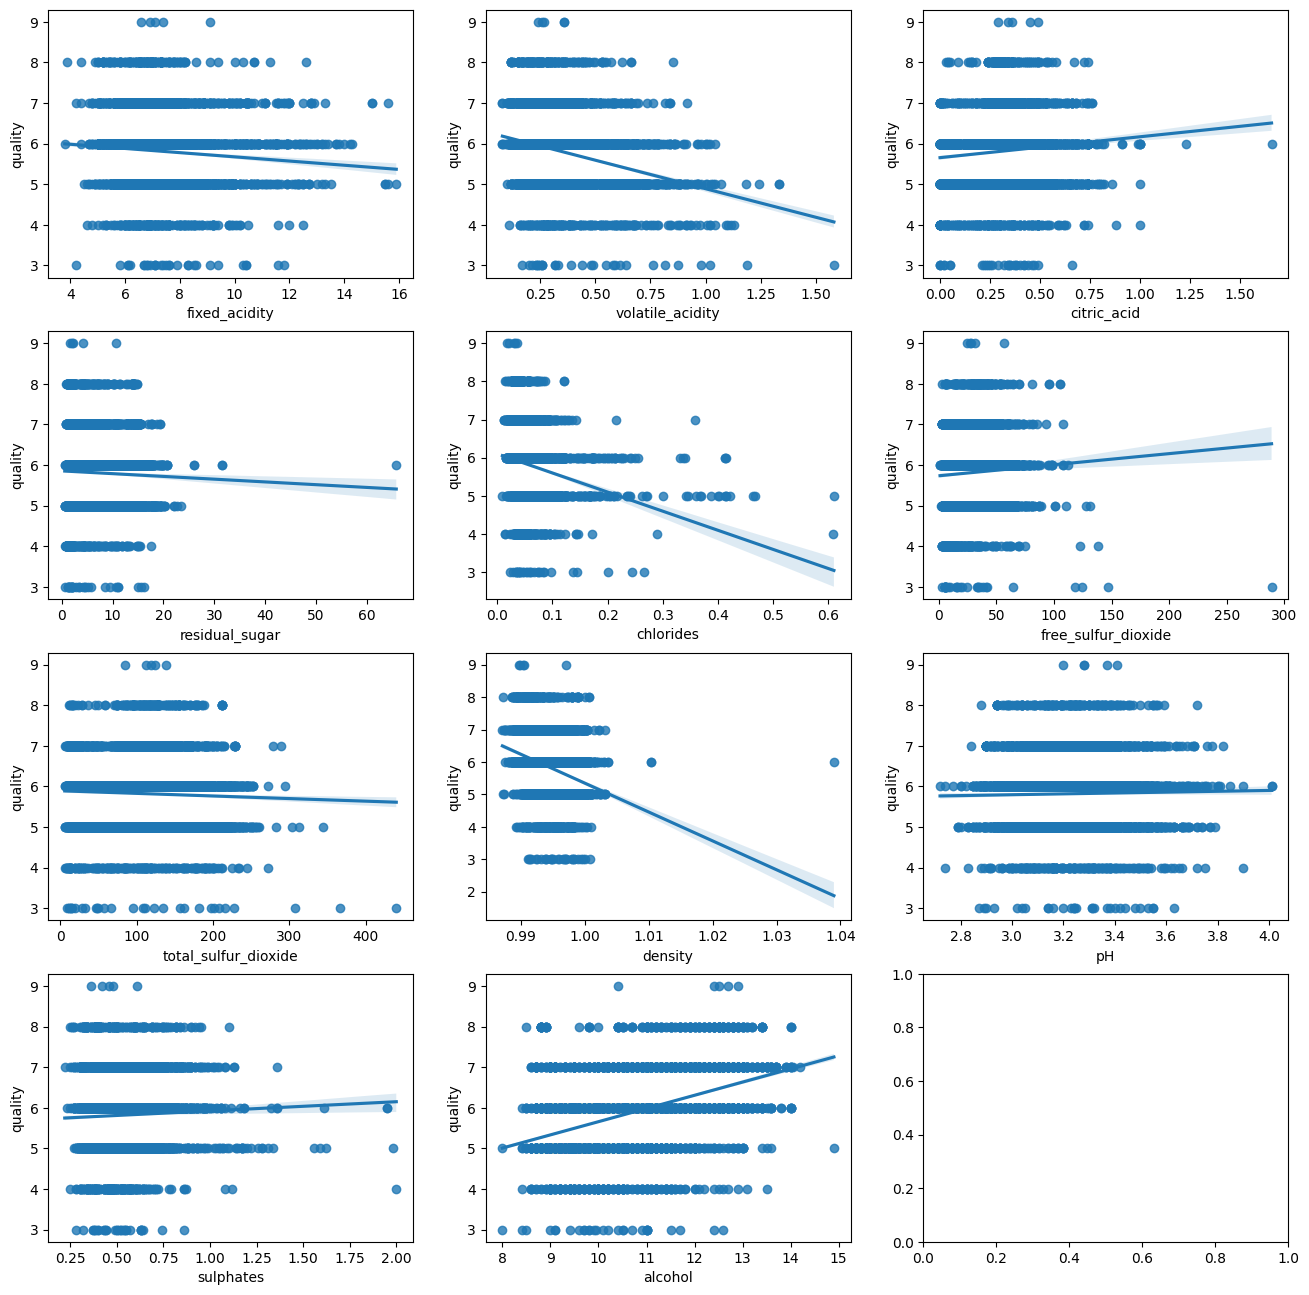

In [107]:
# 산점도
fig,axs = plt.subplots(figsize=(16,16),ncols=3,nrows=4)
x_features = list(X.columns)

for i, feat in enumerate(x_features): # 13개 독립 변수 이름으로 반복하면서
    row = i// 3
    col = i % 3
    sns.regplot(data=df_wine_quality,x=feat,y="quality",ax=axs[row][col])


plt.show()

In [94]:
## 9등급 와인만 추출
df_temp = df_wine_quality[df_wine_quality['quality'] == 9]

In [95]:
df_wine_top = df_temp.drop(['quality','color'],axis=1)

In [109]:
predicts = model.predict(df_wine_top)

In [110]:
predicts

array([6.02739241, 6.57724823, 6.50046455, 6.67089157, 6.65271444])

##### 결론
- 머신러닝으로 학습을 해도 9등급 와인에 대해서 제대로 예측은 어려워 보인다....